In [38]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numexpr

seaborn.set_style('whitegrid')

In [40]:
directory = '/Users/mg/CloudStation/publications/2016/saner2016/data/'
technologies = ['jpa', 'jdbc', 'hibernate']

In [41]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

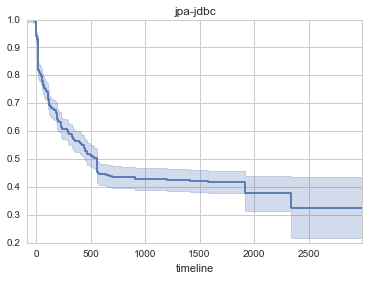

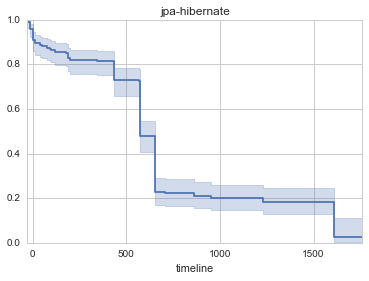

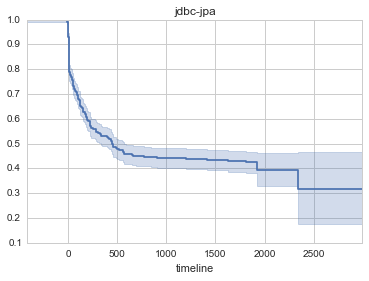

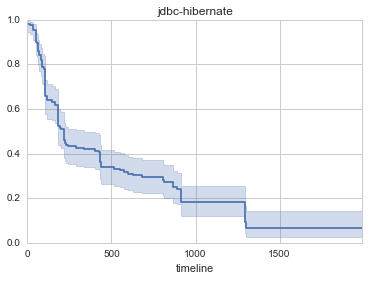

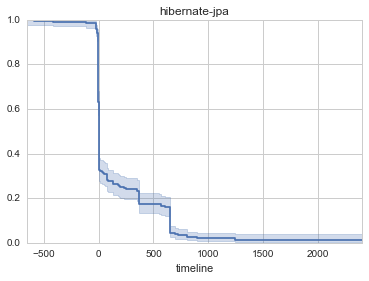

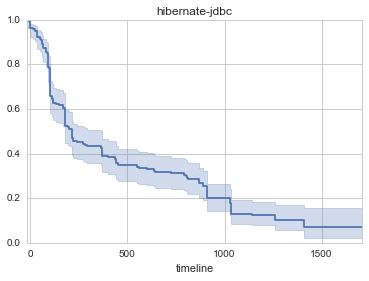

In [42]:
for t1 in technologies:
    for t2 in technologies:
        if t1 is not t2:
            data = pd.read_csv(directory + 'survival-' + t1 + '-' + t2 + '.csv')
            kmf.fit(data['duration'], data['event']).plot(title=t1 + '-' + t2, legend=False)

Plot the survival rates of files that used A and started to use B after B has been introduced in a project. 

Duration: time between B is introduced in a project and B is introduced in the considered file.

jpa after jdbc : 184 / 3193
jpa after hibernate : 41 / 974
jdbc after jpa : 213 / 6489
jdbc after hibernate : 56 / 1589
hibernate after jpa : 85 / 653
hibernate after jdbc : 54 / 843


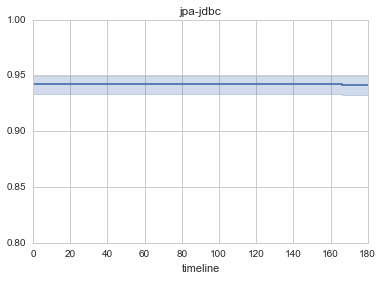

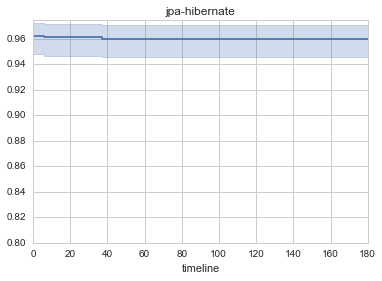

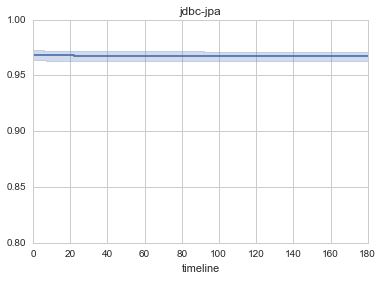

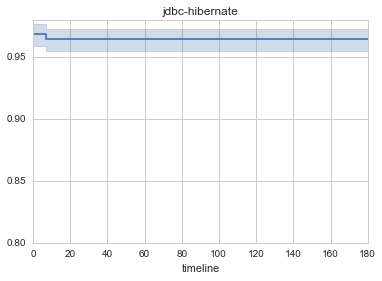

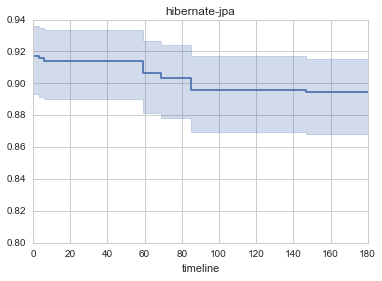

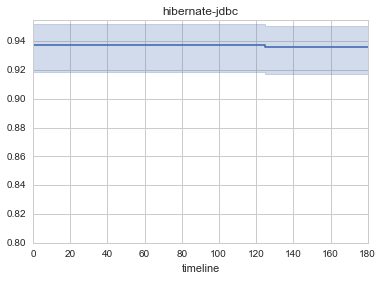

In [12]:
for t1 in technologies:
    for t2 in technologies:
        if t1 is not t2:
            data = pd.read_csv(directory + 'survival-' + t1 + '-after-' + t2 + '.csv')
            print(t1 + " after " + t2 + " : " + str(len(data[data['event']==1].index)) + " / " + str(len(data.index)))
            kmf.fit(data['duration'], data['event'])
            ax = kmf.plot(title=t1 + '-' + t2, legend=False)
            ax.set_xlim(left=0, right=180)
            lims = ax.get_ylim()
            ax.set_ylim(bottom=0.80, top=min(1, lims[1]))
            plt.savefig(directory + 'survival-' + t1 + '-after-' + t2 + '.pdf')
            plt.draw()
            
        

Displays the distribution over projects of the ratio of files having A that finally have B

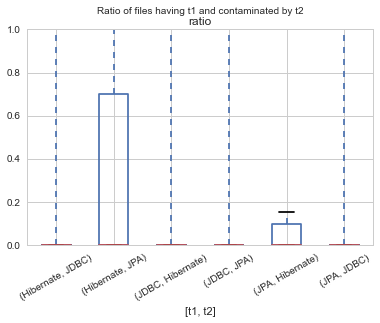

In [13]:
df = pd.read_csv(directory + 'contamination-ratio.csv')
technos = ['JDBC', 'JPA', 'Hibernate']
axe = df.boxplot(column='ratio', by=['t1','t2'], rot=30)
fig = axe.get_figure()
fig.suptitle('Ratio of files having t1 and contaminated by t2')
plt.savefig(directory + 'contamination-ratio.pdf')
plt.draw()

Shows the proportion of files that did have A when B has been introduced, and that have been contaminated by B after that

In [14]:
df = pd.read_csv(directory + 'contamination-ratio-evolution.csv')
technos = ['JDBC', 'JPA', 'Hibernate']

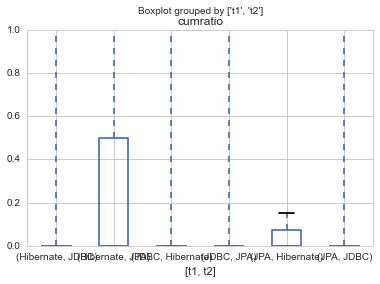

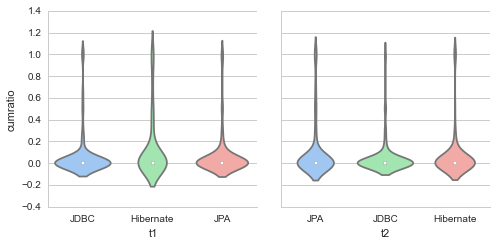

In [15]:
# 'Final' file status
DURATION = 15
df[df.duration==DURATION].boxplot(column='cumratio', by=['t1','t2'])
plt.savefig(directory + 'contamination-ratio-15w.pdf')
plt.draw()

#seaborn.violinplot(data=df[df.duration==DURATION], x='t2', y='cumratio')
seaborn.PairGrid(df[df.duration==DURATION], 
                 x_vars=['t1', 't2'],
                 y_vars=['cumratio'],
                 aspect=1,
                 size=3.5).map(seaborn.violinplot, palette='pastel')

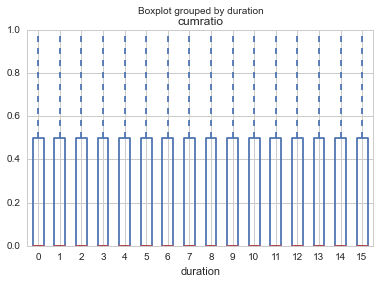

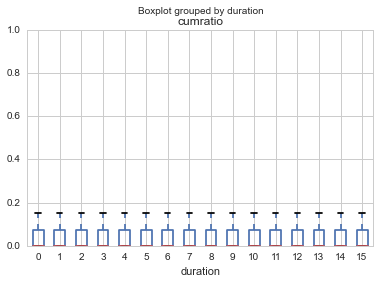

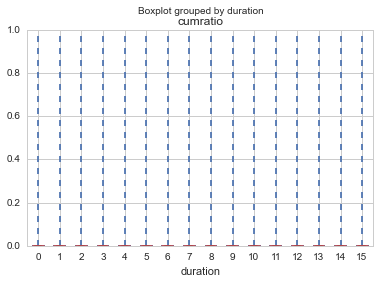

In [16]:
df_hb_jpa = df[(df.t1 == 'Hibernate') & (df.t2 == 'JPA')]
df_hb_jpa.boxplot(column='cumratio', by='duration')
plt.savefig(directory + 'contamination-hbm-jpa-evol.pdf')
plt.draw()


db_jpa_hbm = df[(df.t1 == 'JPA') & (df.t2 == 'Hibernate')]
db_jpa_hbm.boxplot(column='cumratio', by='duration')
plt.savefig(directory + 'contamination-jpa-hbm-evol.pdf')
plt.draw()

df.boxplot(column='cumratio', by='duration')
plt.savefig(directory + 'contamination-global-evol.pdf')
plt.draw()

# Category evolution

HBM -> JPA : 225
JPA -> HBM : 258


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125850690>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1281a9950>]], dtype=object)

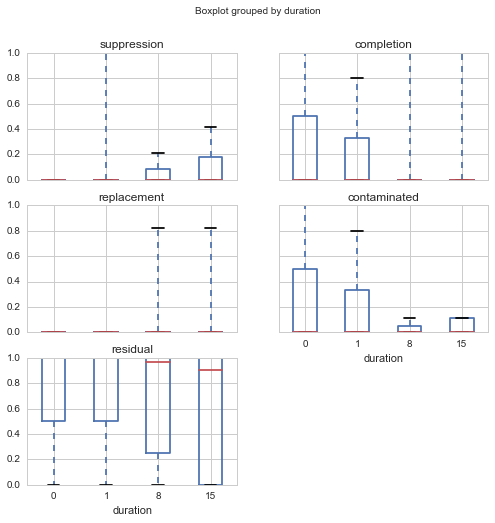

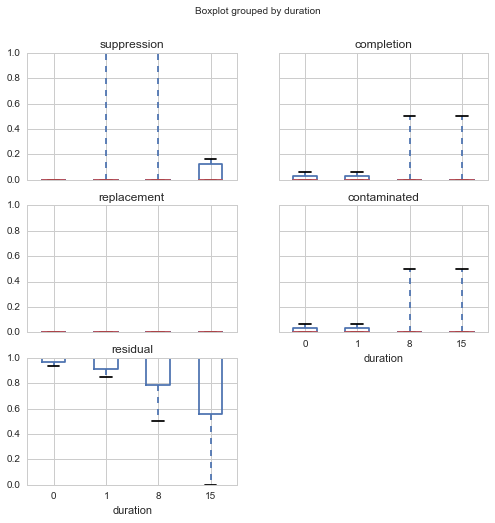

In [71]:
df_category = pd.read_csv(directory + "partition-ratio-evolution.csv")
df_category['contaminated'] = df_category['completion'] + df_category['replacement']

# Only projects having at least 10 interesting files
# df_category = df_category.query("interestingfiles >= 10")

hbm_jpa = "(t1 == 'Hibernate') & (t2 == 'JPA')"
jpa_hbm = "(t1 == 'JPA') & (t2 == 'Hibernate')"

print("HBM -> JPA : " + str(len(df_category.query(hbm_jpa))))
print("JPA -> HBM : " + str(len(df_category.query(jpa_hbm))))

cols = ['suppression', 'completion', 'replacement', 'contaminated', 'residual']

df_category.query(hbm_jpa).boxplot(column=cols, by='duration', figsize=(8,8))
df_category.query(jpa_hbm).boxplot(column=cols, by='duration', figsize=(8,8))
